# Work
試改變 monitor "Validation Accuracy" 並比較結果
調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
#調整 earlystop 的等待次數至 10
#最佳泛化準確率為0.5039


In [8]:
"""
# 載入 Callbacks, 並將 monitor 設定為監控 validation loss
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="Validation Accuracy", 
                          patience=10, 
                          verbose=1
                          )

In [9]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

//anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `Validation Accuracy` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 5s 99us/step - loss: 1.7331 - accuracy: 0.3962 - val_loss: 1.9648 - val_accuracy: 0.3069
Epoch 3/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6098 - accuracy: 0.4380 - val_loss: 1.8254 - val_accuracy: 0.3618
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5368 - accuracy: 0.4641 - val_loss: 1.7174 - val_accuracy: 0.4025
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4827 - accuracy: 0.4835 - val_loss: 1.6498 - val_accuracy: 0.4187
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4385 - accuracy: 0.4987 - val_loss: 1.5867 - val_accuracy: 0.4409
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4008 - accuracy: 0.5128 - val_loss: 1.5503 - val_accuracy: 0.4508
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3668 - accuracy: 0.5250 - val_loss: 1.5232 -

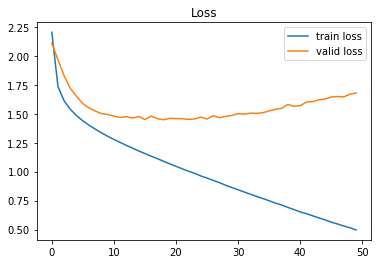

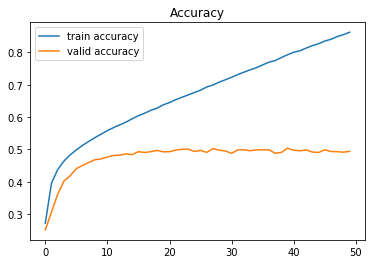

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


In [11]:
#調整 earlystop 的等待次數至 25
#最佳泛化準確率為0.5005

In [12]:
"""
# 載入 Callbacks, 並將 monitor 設定為監控 validation loss
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="Validation Accuracy", 
                          patience=25, 
                          verbose=1
                          )

In [13]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512 

//anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `Validation Accuracy` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 5s 102us/step - loss: 1.7343 - accuracy: 0.3980 - val_loss: 1.9512 - val_accuracy: 0.3113
Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6075 - accuracy: 0.4386 - val_loss: 1.8008 - val_accuracy: 0.3795
Epoch 4/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.5371 - accuracy: 0.4633 - val_loss: 1.6935 - val_accuracy: 0.4182
Epoch 5/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.4819 - accuracy: 0.4842 - val_loss: 1.6325 - val_accuracy: 0.4320
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.4385 - accuracy: 0.5000 - val_loss: 1.5735 - val_accuracy: 0.4579
Epoch 7/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.3982 - accuracy: 0.5127 - val_loss: 1.5460 - val_accuracy: 0.4604
Epoch 8/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.3658 - accuracy: 0.5247 - val_loss: 1.524

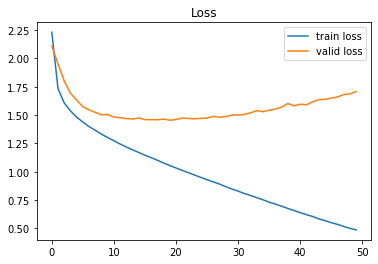

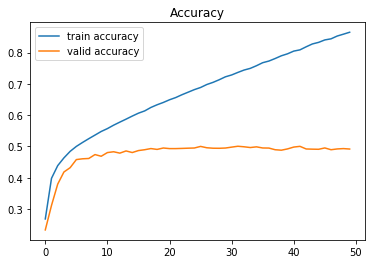

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [ ]:
#小結：
#調整 earlystop 的等待次數至 10 ＝>最佳泛化準確率為0.5039
#調整 earlystop 的等待次數至 25=>最佳泛化準確率為0.5005
#由以上可得知,最佳泛化準確率大致分布於0.49~0.51之間,且 earlystop 次數並無助於泛化準確率之提升.